# Web Scraping Project: The Data Analyst profession

The role of a data analyst encompasses a diverse array of responsibilities and prerequisites, making it indispensable in sectors that necessitate comprehensive data analysis. Nevertheless, there exists a lack of clarity regarding which domains predominantly demand the services of data analysts. Is it the banking sector, the finance industry, or perhaps mobile phone operators? Furthermore, the requisite skills for data analysts vary significantly, with certain job postings mandating proficiency solely in Excel, while others seek expertise in the domain of Machine Learning.

The primary objective of this project is to delineate the preeminent skills requisite for a data analyst. Our endeavor entails the classification of a myriad of job vacancies to discern specific domains wherein these skills are most sought after.

### Data Gathering

During this procedural phase, the primary objective was to accumulate data from the website https://us.jobsora.com/. The website was chosen on the basis of its protection power as most of well-known aggregators for the job search are protected with different kinds of defence systems like CLoudFlare and Captcha. The geographical placement of the job vacancies was not of paramount concern, as the principal criterion for inclusion was the utilization of the English language within the vacancy description. The specified search query for this data retrieval endeavor was "data analyst." Data collection occurred over a one-month timeframe, with intervals of 10 days between each acquisition session, specifically on the dates of November 8th, November 18th, and November 28th.

In [1]:
# Importing the libraries
from urllib.parse import quote
import http.client
from bs4 import BeautifulSoup
import time
from tqdm import tqdm
import pandas as pd
import openpyxl
import re
import matplotlib.pyplot as plt

In [2]:
# Function for the first extraction of job listings
def extract(url):
    encoded_url = quote(url, safe='')
    conn = http.client.HTTPSConnection("api.scrapingant.com")
    conn.request("GET", f"/v2/general?url={encoded_url}&x-api-key=02b10626343e42a2b8459d271eb27644&return_page_source=true")
    res = conn.getresponse()
    data = res.read()
    html = data.decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    return soup

In [3]:
title_count = 0
empty_job_lists = 0

# Function for the transformation and the second extraction of the links in each job listing
def transform(soup):
    global title_count 
    global empty_job_lists 

    ul = soup.find_all('article', class_="js-listing-item")

    for job_listing in ul:
        title_element = job_listing.find('a', class_ = 'u-text-double-line')

        if title_element is not None:
            title = title_element.text.strip()
            link = title_element['href']
            title_count += 1

            soup_inner = extract(link)
            job_description = soup_inner.find_all('div', class_='w-gap-xl')
            # Some pop-up banners encountered during the navigation hinder the data collection process. 
            # Therefore, at this stage, we attempt to revisit the same link for another iteration.
            if not job_description:
                soup_inner_again = extract(link)
                job_description = soup_inner_again.find_all('div', class_='w-gap-xl')
                # And if this attempt did not help - we count it as an empty job list
                if not job_description:
                    empty_job_lists += 1
                else:
                    titles.append(title)
                    job_descriptions.append(job_description)
            else:
                titles.append(title)
                job_descriptions.append(job_description)

    return titles, job_descriptions



In [4]:
titles = []
job_descriptions = []

# The structre of the website's URL makes it possible to iterate over the web pages, however, the first page consists of many
# duplicates, so it is better to begin with the page 2.
for i in tqdm(range(2, 61), desc="Pages", unit="page"):
    print(f'Gathering page number {i}')
    current_url = f'https://us.jobsora.com/jobs?page={i}&query=%22Data+Analyst%22'
    soup = extract(current_url)
    transform(soup)

data = {
'Title': titles,
'Job Description': job_descriptions}

df = pd.DataFrame(data)
print('Summary statistics:')
print("Total job titles:", title_count)
print("Job listings with empty descriptions:", empty_job_lists)


Pages:   0%|          | 0/59 [00:00<?, ?page/s]

Gathering page number 2


Pages:   2%|▏         | 1/59 [02:06<2:02:06, 126.31s/page]

Gathering page number 3


Pages:   3%|▎         | 2/59 [04:26<2:07:29, 134.20s/page]

Gathering page number 4


Pages:   5%|▌         | 3/59 [06:09<1:52:08, 120.14s/page]

Gathering page number 5


Pages:   7%|▋         | 4/59 [07:45<1:41:21, 110.57s/page]

Gathering page number 6


Pages:   8%|▊         | 5/59 [09:34<1:39:07, 110.13s/page]

Gathering page number 7


Pages:  10%|█         | 6/59 [11:45<1:43:33, 117.24s/page]

Gathering page number 8


Pages:  12%|█▏        | 7/59 [13:49<1:43:35, 119.53s/page]

Gathering page number 9


Pages:  14%|█▎        | 8/59 [15:35<1:37:44, 115.00s/page]

Gathering page number 10


Pages:  15%|█▌        | 9/59 [17:18<1:32:48, 111.37s/page]

Gathering page number 11


Pages:  17%|█▋        | 10/59 [19:55<1:42:28, 125.47s/page]

Gathering page number 12


Pages:  19%|█▊        | 11/59 [21:36<1:34:18, 117.89s/page]

Gathering page number 13


Pages:  20%|██        | 12/59 [23:43<1:34:38, 120.82s/page]

Gathering page number 14


Pages:  22%|██▏       | 13/59 [25:54<1:34:53, 123.78s/page]

Gathering page number 15


Pages:  24%|██▎       | 14/59 [27:41<1:29:00, 118.68s/page]

Gathering page number 16


Pages:  25%|██▌       | 15/59 [29:24<1:23:32, 113.92s/page]

Gathering page number 17


Pages:  27%|██▋       | 16/59 [31:41<1:26:33, 120.78s/page]

Gathering page number 18


Pages:  29%|██▉       | 17/59 [34:02<1:28:51, 126.94s/page]

Gathering page number 19


Pages:  31%|███       | 18/59 [36:16<1:28:19, 129.24s/page]

Gathering page number 20


Pages:  32%|███▏      | 19/59 [38:39<1:28:55, 133.38s/page]

Gathering page number 21


Pages:  34%|███▍      | 20/59 [40:40<1:24:13, 129.58s/page]

Gathering page number 22


Pages:  36%|███▌      | 21/59 [42:23<1:17:00, 121.59s/page]

Gathering page number 23


Pages:  37%|███▋      | 22/59 [44:48<1:19:13, 128.48s/page]

Gathering page number 24


Pages:  39%|███▉      | 23/59 [46:52<1:16:21, 127.27s/page]

Gathering page number 25


Pages:  41%|████      | 24/59 [49:25<1:18:44, 134.98s/page]

Gathering page number 26


Pages:  42%|████▏     | 25/59 [51:21<1:13:12, 129.19s/page]

Gathering page number 27


Pages:  44%|████▍     | 26/59 [53:19<1:09:14, 125.90s/page]

Gathering page number 28


Pages:  46%|████▌     | 27/59 [55:40<1:09:30, 130.33s/page]

Gathering page number 29


Pages:  47%|████▋     | 28/59 [57:48<1:07:05, 129.87s/page]

Gathering page number 30


Pages:  49%|████▉     | 29/59 [1:07:32<2:13:03, 266.11s/page]

Gathering page number 31


C:\Users\NKrylo01\AppData\Local\Temp\ipykernel_12760\206049065.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(html, 'html.parser')
Pages:  51%|█████     | 30/59 [1:11:10<2:01:38, 251.69s/page]

Gathering page number 32


Pages:  53%|█████▎    | 31/59 [1:13:09<1:38:45, 211.63s/page]

Gathering page number 33


Pages:  54%|█████▍    | 32/59 [1:15:30<1:25:45, 190.59s/page]

Gathering page number 34


Pages:  56%|█████▌    | 33/59 [1:17:26<1:12:52, 168.17s/page]

Gathering page number 35


Pages:  58%|█████▊    | 34/59 [1:19:42<1:06:06, 158.66s/page]

Gathering page number 36


Pages:  59%|█████▉    | 35/59 [1:21:42<58:47, 146.99s/page]  

Gathering page number 37


Pages:  61%|██████    | 36/59 [1:23:57<54:59, 143.45s/page]

Gathering page number 38


Pages:  63%|██████▎   | 37/59 [1:26:19<52:26, 143.01s/page]

Gathering page number 39


Pages:  64%|██████▍   | 38/59 [1:28:38<49:38, 141.83s/page]

Gathering page number 40


Pages:  66%|██████▌   | 39/59 [1:30:31<44:18, 132.95s/page]

Gathering page number 41


Pages:  68%|██████▊   | 40/59 [1:34:16<50:51, 160.62s/page]

Gathering page number 42


Pages:  69%|██████▉   | 41/59 [1:36:44<47:04, 156.92s/page]

Gathering page number 43


Pages:  71%|███████   | 42/59 [1:39:05<43:04, 152.05s/page]

Gathering page number 44


Pages:  73%|███████▎  | 43/59 [1:44:35<54:47, 205.48s/page]

Gathering page number 45


Pages:  75%|███████▍  | 44/59 [1:46:42<45:30, 182.01s/page]

Gathering page number 46


Pages:  76%|███████▋  | 45/59 [1:48:57<39:10, 167.86s/page]

Gathering page number 47


Pages:  78%|███████▊  | 46/59 [1:50:57<33:14, 153.39s/page]

Gathering page number 48


Pages:  80%|███████▉  | 47/59 [1:53:35<30:59, 154.92s/page]

Gathering page number 49


Pages:  81%|████████▏ | 48/59 [1:55:31<26:15, 143.22s/page]

Gathering page number 50


Pages:  83%|████████▎ | 49/59 [1:57:47<23:29, 140.92s/page]

Gathering page number 51


Pages:  85%|████████▍ | 50/59 [2:00:07<21:05, 140.60s/page]

Gathering page number 52


Pages:  86%|████████▋ | 51/59 [2:01:55<17:27, 130.95s/page]

Gathering page number 53


Pages:  88%|████████▊ | 52/59 [2:03:58<14:59, 128.45s/page]

Gathering page number 54


Pages:  90%|████████▉ | 53/59 [2:06:22<13:19, 133.33s/page]

Gathering page number 55


Pages:  92%|█████████▏| 54/59 [2:08:53<11:32, 138.55s/page]

Gathering page number 56


Pages:  93%|█████████▎| 55/59 [2:10:40<08:35, 128.93s/page]

Gathering page number 57


Pages:  95%|█████████▍| 56/59 [2:12:37<06:16, 125.51s/page]

Gathering page number 58


Pages:  97%|█████████▋| 57/59 [2:15:02<04:22, 131.41s/page]

Gathering page number 59


Pages:  98%|█████████▊| 58/59 [2:16:57<02:06, 126.41s/page]

Gathering page number 60


Pages: 100%|██████████| 59/59 [2:19:23<00:00, 141.75s/page]

Summary statistics:
Total job titles: 1180
Job listings with empty descriptions: 186


In [5]:
df.to_excel('/Users/NKrylo01/OneDrive - AppsBase/Documents/projects/df3.xlsx')


The aforementioned code underwent three iterations for the purpose of data acquisition. The presented segment delineates the data gathering process during the final iteration.

### Data cleaning

In [79]:
# importing the libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.metrics import silhouette_score  
import warnings
from langdetect import detect
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NKrylo01\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

The process entails the importation of three distinct dataframes corresponding to the respective dates of November 8th, November 18th, and November 28th. Subsequently, a concatenation operation will be executed to amalgamate these individual dataframes into a singular composite structure. Following this consolidation, a data cleaning procedure will be undertaken to enhance the overall quality and coherence of the aggregated dataset.

In [111]:
df1 = pd.read_excel('/Users/NKrylo01/OneDrive - AppsBase/Documents/projects/df.xlsx')

In [112]:
df2 = pd.read_excel('/Users/NKrylo01/OneDrive - AppsBase/Documents/projects/df2.xlsx')

In [113]:
df3 = pd.read_excel('/Users/NKrylo01/OneDrive - AppsBase/Documents/projects/df3.xlsx')

In [114]:
print(f'The first df has the length {df1.shape[0]}')
print(f'The second df has the length {df2.shape[0]}')
print(f'The third df has the length {df3.shape[0]}')

The first df has the length 964
The second df has the length 974
The third df has the length 994


In [115]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.shape

(2932, 3)

First, it is necessary to eliminate certain specific HTML symbols. Following an analysis of the vacancy structure, it became evident that certain employers compose their job descriptions as a single, lengthy text, interspersed with shorter lines containing additional, and sometimes irrelevant information (for our purposes). To enhance clarity, the decision has been made to eliminate these shorter lines from the text.

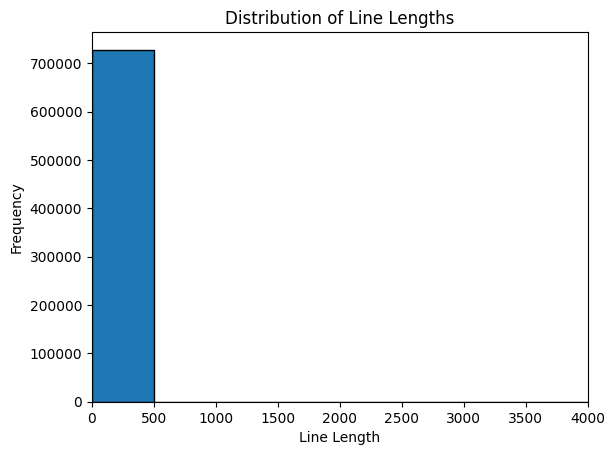

In [116]:
def clean_html(text):
    pattern = r'<[^>]+>'
    cleaned_text = re.sub(pattern, ' ', text)
    cleaned_text = re.sub(r'\bjob number: \w+\b', ' ', cleaned_text)
    cleaned_text = re.sub(r'[^a-zA-Z\s+]', ' ', cleaned_text)
    cleaned_text = re.sub(r'\b(job description|descriptionjob|description job|j ljbffr|description)\b', '', cleaned_text)
    return cleaned_text

df['Job Description'] = df['Job Description'].str.lower()
df['Job Description'] = df['Job Description'].apply(clean_html)
df['Job Description'] = df['Job Description'].str.split('\n')

line_lengths = df['Job Description'].apply(lambda lines: pd.Series([len(line) for line in lines]))

max_len = 4000
bin_edges = list(range(0, max_len + 500, 500))
plt.hist(line_lengths.values.flatten(), bins=bin_edges, edgecolor='black')
plt.title('Distribution of Line Lengths')
plt.xlabel('Line Length')
plt.ylabel('Frequency')
plt.xlim((0, max_len))  
plt.show()

In [117]:
# There is a great number of lines with the length less than 500. It is necessary to filter them out to clean the data.
df['Job Description'] = df['Job Description'].apply(
    lambda lines: '\n'.join(
        filter(lambda line: len(line) > 500, lines)
    )
)

Upon reviewing the website and preliminary data analysis, it was observed that job vacancies from the same employer were posted at different points in time. To eliminate redundancy and the formation of clusters that include the same job descriptions, duplicates must be removed. The first and last 5 words from each job description are compared. The following code identifies similar job descriptions (based on the first 5 words and last 5 words) using a similarity threshold of 0.99, and keeps only one of the similar rows.
This helped to prevent the creation of clusters consisting of the vacancies with the same description.

In [118]:
# Extract the first 5 words for similarity comparison
df['First_Words'] = df['Job Description'].apply(lambda x: ' '.join(x.split()[:5]))

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['First_Words'])

cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

cosine_sim_df = pd.DataFrame(cosine_similarities, index=df.index, columns=df.index)

unique_descriptions = []
visited_indices = set()

for i in range(len(df)):
    if i not in visited_indices:
        similar_indices = cosine_sim_df[i][cosine_sim_df[i] > 0.99].index.tolist()
        
        # Check if similar_indices is not empty
        if similar_indices:
            unique_descriptions.append(df.loc[similar_indices].iloc[0])
            visited_indices.update(similar_indices)

df = pd.DataFrame(unique_descriptions).drop(columns=['First_Words']).reset_index(drop=True)

# Extract the last 5 words for similarity comparison
df['Last_Words'] = df['Job Description'].apply(lambda x: ' '.join(x.split()[:-5]))

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Last_Words'])
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_similarities, index=df.index, columns=df.index)

unique_descriptions = []
visited_indices = set()

for i in range(len(df)):
    if i not in visited_indices:
        similar_indices = cosine_sim_df[i][cosine_sim_df[i] > 0.99].index.tolist()
        
        # Check if similar_indices is not empty
        if similar_indices:
            unique_descriptions.append(df.loc[similar_indices].iloc[0])
            visited_indices.update(similar_indices)

df = pd.DataFrame(unique_descriptions).drop(columns=['Last_Words'])

df_len = df.shape[0]
print(f'The final dataframe consists of {df_len} rows')

The final dataframe consists of 1172 rows


In [119]:
# Sorting out non-english job descriptions
def contains_non_english(text, threshold=0.9):
    try:
        language = detect(text)
        return language != 'en'
    except:
        return True

df['NonEnglish'] = df['Job Description'].apply(contains_non_english)
df = df[df['NonEnglish'] == False]

In [121]:
# Cleaning some patterned additions to the job descriptions
df['Job Description'] = df['Job Description'].apply(lambda x: str(x))
df['Job Description'] = df['Job Description'].str.replace(' ll ', '')
df['Job Description'] = df['Job Description'].str.replace(' s ', '')
df['Job Description'] = df['Job Description'].str.replace('homeward is an affirmative action and equal opportunity employer all qualified applicant will receive consideration for employment without regard to race color religion sex disability age sexual orientation gender identity national origin veteran status or genetic information homeward is committed to providing access equal opportunity and reasonable accommodation for individual with disability in employment it service program and activity', '')
df['Job Description'] = df['Job Description'].str.replace('not discriminate on the basis of race color gender religion national origin age disability sexual orientation pregnancy veteran status genetic information or any other basis prohibited by applicable law at edward jones we value and respect our associate and their contribution and we recognize individual effort through a reward program that promotes a long term career financial security and well being visit our career site to learn more about our total compensation approach which in addition to base salary typically includes benefit bonus and profit sharing the salary range for this role is based on national data and actual pay is based on skill experience education and other relevant factor for a potential new associate salary category headquarters', '')
df['Job Description'] = df['Job Description'].str.replace('an equal employment opportunity affirmative action employer that empowers our people to fearlessly drive change no matter their race color ethnicity religion sex including pregnancy childbirth lactation or related medical condition national origin ancestry age marital status sexual orientation gender identity and expression disability veteran status military or uniformed service member status genetic information or any other status protected by applicable federal state local or international law', '')

### K-means clustering

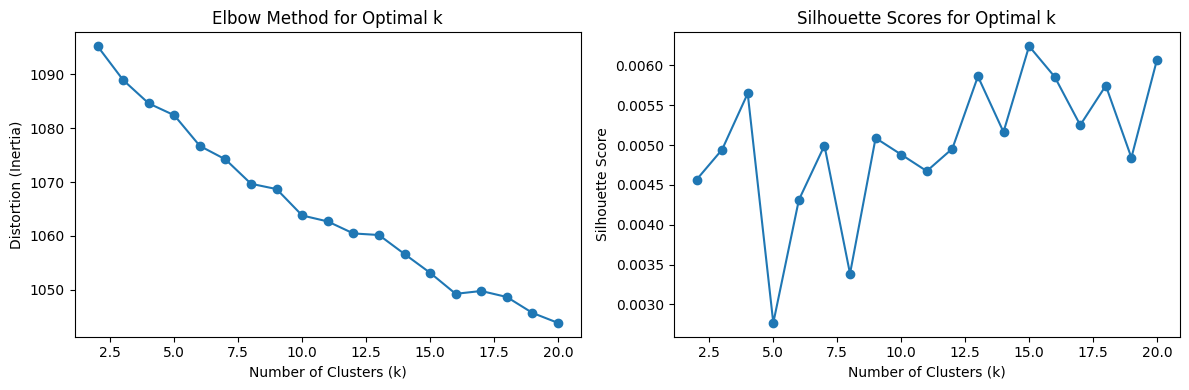

In [139]:
# Filter out warnings
warnings.filterwarnings("ignore")

# Some modifications for the better use of clusterization tool
df['Job Description'] = df['Job Description'].apply(lambda x: x.encode('utf-8').decode('utf-8'))
custom_stop_words = list(ENGLISH_STOP_WORDS)
# Some additional stop words which were chosen in cases when the both words are present in more than 3 word clouds charts,
# or if it is a verb
custom_stop_words.extend(['data', 'work','career','role', 'working', 'company', 'business', 'experience', 'analysis', 'analyst', 'analytics', 'job', 'employee',
                         'position', 'status','senior', 'junior','dexian,' 'team', 'support', 'insight', 'information', 'stamford', 'ability', 'project', 'skill', 'process',
                          'management', 'program','including', 'ensure', 'test', 'team', 'beacon','hill','related', 'opportunity','required', 'fidelity', 'requirement',
                          'reporting', 'need', 'year','amp', '&amp;', 'ucsf', 'edward jones', 'homeward', 'booz', 'allen', 'benefit', 'university', 'development', 'client', 'time',
                          'quality','report', 'tool', 'database', 'solution', 'technical', 'knowledge', 'paid', 'compensation', 'master', 'sap'
                         ])


# Using Elbow Method to define the number of clusters
min_clusters = 2
max_clusters = 20

distortions = []
sil_scores = []

for num_clusters in range(min_clusters, max_clusters + 1):
    pipeline = make_pipeline(
        TfidfVectorizer(stop_words=custom_stop_words),
        KMeans(n_clusters=num_clusters, random_state=42)
    )
    # Lemmatization (the process of reducing a word to its base or root form)
    df['Job Description'] = df['Job Description'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(word) for word in x.split()]))
    
    # Calculate distortion for Elbow Method
    pipeline.fit(df['Job Description'])
    distortions.append(pipeline.named_steps['kmeans'].inertia_)
    
    # Silhouette Score (the high score indicates that the object is well matched to its own cluster)
    labels = pipeline.named_steps['kmeans'].labels_
    sil_score = silhouette_score(pipeline.named_steps['tfidfvectorizer'].transform(df['Job Description']), labels)
    sil_scores.append(sil_score)

# Plot the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(min_clusters, max_clusters + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')

plt.subplot(1, 2, 2)
plt.plot(range(min_clusters, max_clusters + 1), sil_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


The choice of the number of clusters is based on the Elbow method and Silhouette Score. 

The Elbow Method is a technique in Data Science for determining the optimal number of clusters in a k-means clustering algorithm. It involves running the algorithm for different values of clusters, plotting the within-cluster sum of squares (WCSS) against the number of clusters, and selecting the "elbow" point where further cluster addition provides diminishing returns in terms of model fit. The elbow point indicates the optimal number of clusters for the dataset.

The Silhouette Score is a metric for assessing the quality of clustering in a dataset. It measures how well-defined clusters are based on the cohesion within clusters and separation between clusters, with values ranging from -1 to 1. Higher scores indicate better-defined clusters.

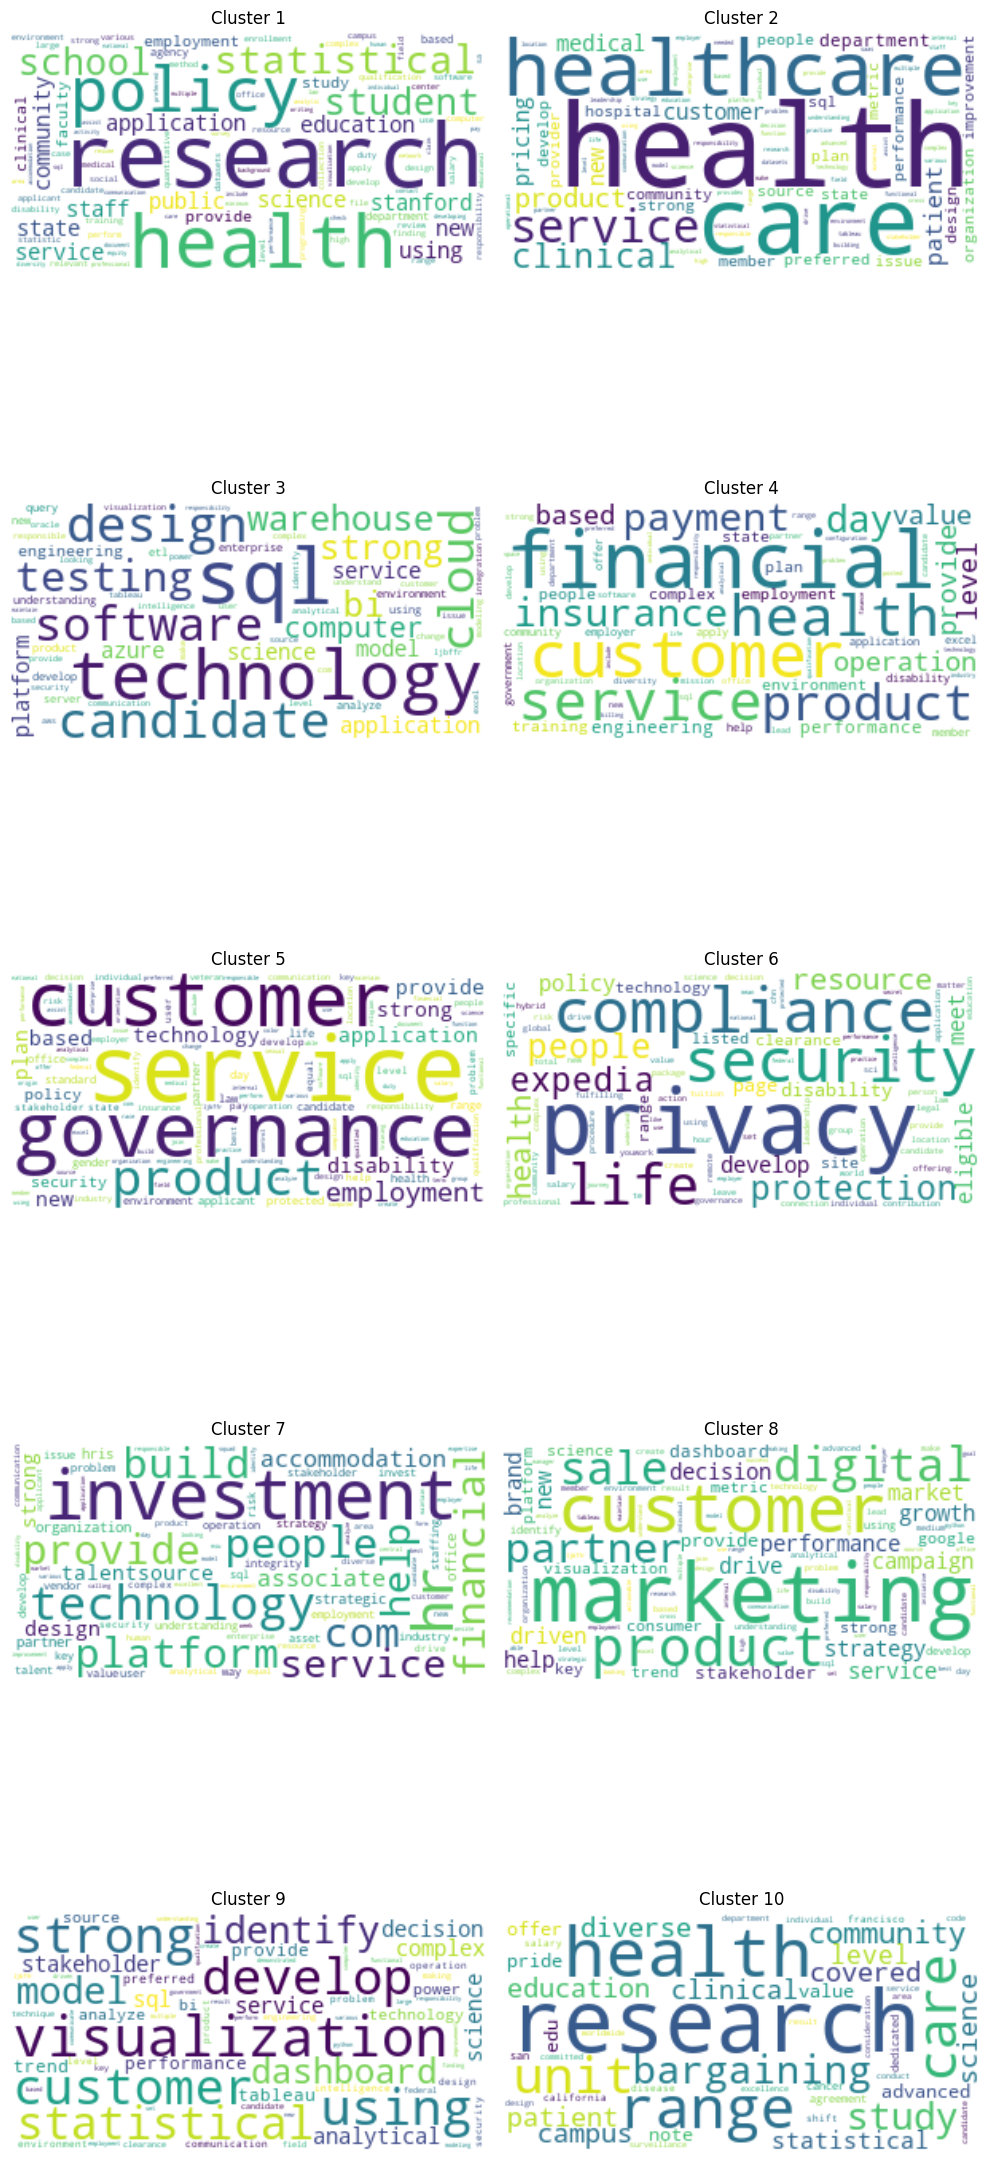

In [145]:
# The chosen number of clusters
num_clusters = 10

# Creating a pipeline with TF-IDF vectorizer, stop words, and K-Means clustering
pipeline = make_pipeline(
    TfidfVectorizer(stop_words=custom_stop_words),
    KMeans(n_clusters=num_clusters, random_state=42)
)

pipeline.fit(df['Job Description'])
df['Cluster'] = pipeline.predict(df['Job Description'])

# WorldCloud visualization
num_rows = (num_clusters // 2) + (num_clusters % 2)
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 5 * num_rows))

for cluster_num, ax in zip(range(num_clusters), axes.flatten()):
    cluster_data = df[df['Cluster'] == cluster_num]['Job Description']
    
    # Use TfidfVectorizer with stop_words to preprocess the text
    cluster_vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
    cluster_tfidf_matrix = cluster_vectorizer.fit_transform(cluster_data)
    feature_names = cluster_vectorizer.get_feature_names_out()
    word_tfidf_scores = dict(zip(feature_names, cluster_tfidf_matrix.sum(axis=0).flat))
    
    # Generate the word cloud, using the words and their TF-IDF scores
    wordcloud = WordCloud(width=300, height=150, background_color='white').generate_from_frequencies(word_tfidf_scores)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Cluster {cluster_num + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


The distribution of objects across clusters is also considered. The main requirement is to make sure that one cluster has more than 10 cases and there are no imbalanced clusters.

In [147]:
# The distribution of the number of titles in each cluster
pd.DataFrame(df.groupby('Cluster')['Title'].count())

,Title
Cluster,
0,90
1,83
2,105
3,105
4,382
5,25
6,39
7,91
8,228


### Description of clusters and demanded skills

Let's describe the clusters based on the skills mentioned in the job descriptions.

In [148]:
clusters_total = df.groupby('Cluster')['Title'].count().reset_index()

In [149]:
# Defining the key words for every paramount skill of a data analyst
skills = [
    ('sql_skill', 'sql'),
    ('r_skill', r'( r |dplyr)'),
    ('python_skill', '(python|pandas)'),
    ('visualizations_skill', '(tableau|matplotlib|seaborn|power bi|ggplot2|plotly|dashboard|visualization|powerpoint|power point|presentation)'),
    ('excel_skill', 'excel |vlookups|pivot table'),
    ('stat_skill', '(statistic|hypothesis|spss|causation|correlation)'),
    ('ml_skill', '(scikit|regression|machine learning|cluster|neural network)'),
    ('soft_skill', '(communication|collaboration|problem solving|problem-solving|critical thinking|critical-thinking|decision making|decision-making)'),
    ('it_structure_skill', '(pipeline|etl|workflow|data warehousing|cloud|storage system|oracle|hadoop|nosql|snowflake|linux|git )'),
    ('agile_skill', '(agile|jira)'),
    ('web_analytics_skill', '(web analytics|google analytics|google analytics certification|data studio|seo)'),
    ('other_languages_skill', '(php|asp|javascript|java|css|html|c\+\+|swift|sas)')]

# Create new columns for each skill condition and set the values
for col_name, condition in skills:
    df[col_name] = df['Job Description'].str.contains(condition, case=False, regex=True).astype(int)

In [150]:
skill_sums = df[['Cluster', 'sql_skill', 'r_skill', 'python_skill', 'visualizations_skill', 'excel_skill', 'stat_skill', 'ml_skill', 'soft_skill', 'it_structure_skill', 'agile_skill', 'web_analytics_skill', 'other_languages_skill']].groupby('Cluster').sum().reset_index()

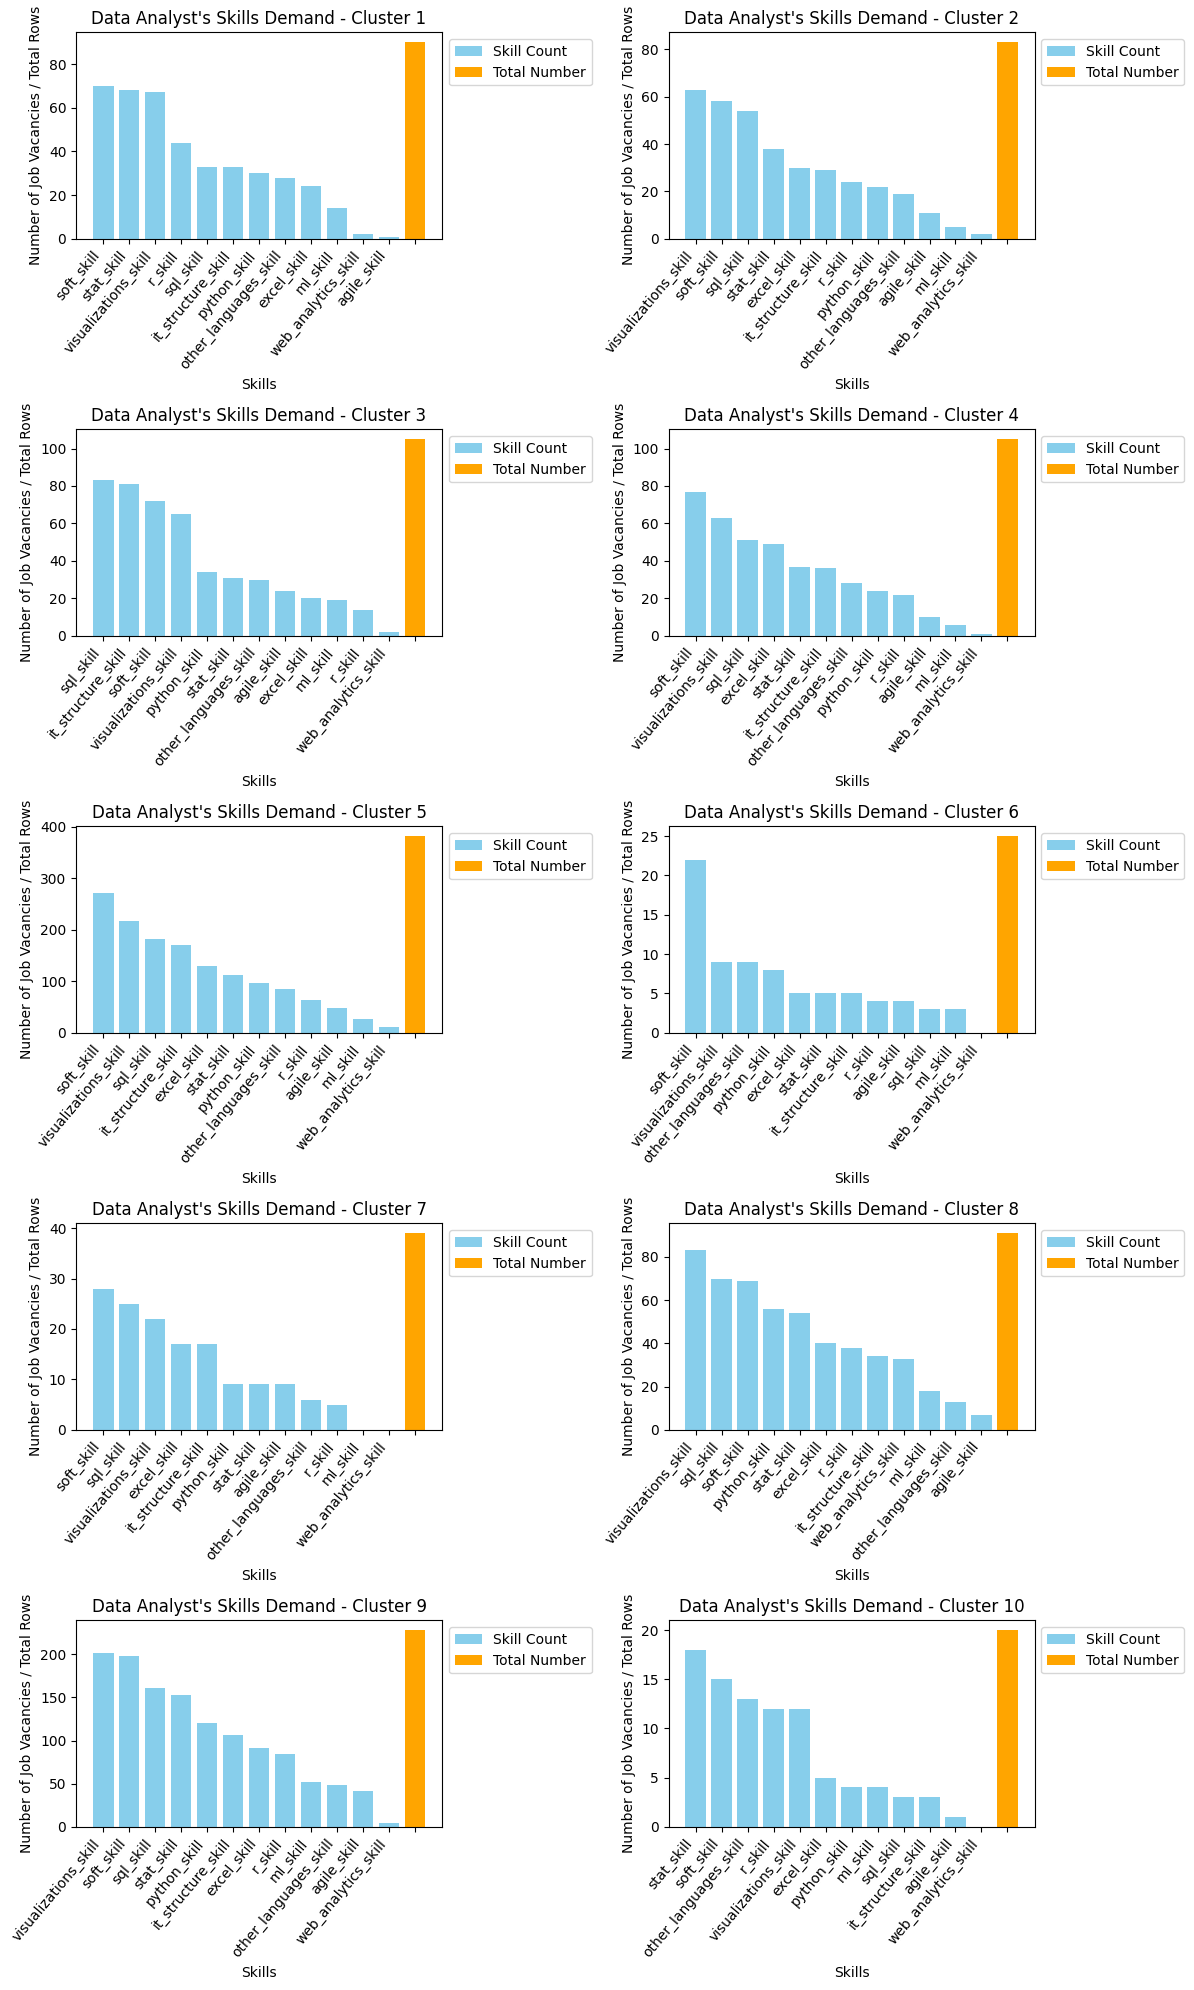

In [151]:
skill_sums = pd.melt(skill_sums, id_vars=['Cluster'], var_name='skill', value_name='count')
skill_sums = skill_sums.sort_values(by=['Cluster', 'count'], ascending=[True, False])
skill_sums_total = pd.merge(clusters_total, skill_sums, on = 'Cluster', how= 'inner')
skill_sums_total.rename(columns={'Title': 'Total number'}, inplace=True)

# Define the number of columns for subplots
num_columns = 2

# Calculate the number of rows needed based on the number of clusters and columns
num_clusters = len(skill_sums_total['Cluster'].unique())
num_rows = (num_clusters + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 4 * num_rows))

# Iterate through unique clusters
for i, cluster in enumerate(skill_sums_total['Cluster'].unique()):
    
    # Calculate the current row and column indices
    row_idx, col_idx = divmod(i, num_columns)
    
    # Filter DataFrame for the specific cluster
    df_cluster = skill_sums_total[skill_sums_total['Cluster'] == cluster]
    
    # Create a bar chart for the current cluster in the subplot
    ax = axes[row_idx, col_idx]
    ax.bar(df_cluster['skill'], df_cluster['count'], color='skyblue', label='Skill Count')
    ax.bar('Total', df_cluster['Total number'].values[0], color='orange', label='Total Number')
    
    ax.set_xlabel('Skills')
    ax.set_ylabel('Number of Job Vacancies / Total Rows')
    ax.set_title(f"Data Analyst's Skills Demand - Cluster {cluster+1}")
    
    # Set rotation and horizontal alignment for x-axis tick labels
    ax.set_xticklabels(df_cluster['skill'], rotation=50, ha='right')
    
    # Add legend outside the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

Let's investigate each cluster in more details.

In [167]:
# Cluster 1
pd.set_option('display.max_colwidth', None)
df[df['Cluster'] == 0][['Title', 'Job Description']].head(1)

,Title,Job Description
18,Data and Policy Analyst- Data Processing Programmer,a a cm data center acumen host an unparalleled wealth of healthcare related database this role provides an opportunity for skilled programmer to contribute to meaningful work to be challenged by programming task in various language and to be part of on going data infrastructure development this position enables programmer to unlock the usability of acumendata holding by transforming them into reliable vetted and well structured research file the file will be used by a variety of research team in their support of healthcare policy work the data processing programmer dpp offer an opportunity to learn from experienced programmer on various area these include advanced programming technique working with large datasets developing robust process for automating the creation of research file improving runtimes and reducing data footprint size the role also provides the opportunity to dive into development project that bring about infrastructure change proactively seeking optimization of the research file infrastructure at acumen over time day to day activity include developing refining and implementing scalable approach for producing high quality research file all the while aiming to enhance the end userneed for flexible comprehensive and current data responsibility developing complex data processing algorithm that combine multiple data source while optimizing run time efficiency loading validating documenting managing and analyzing complex health care data set performing validation check across multiple source to verify data integrity developing data structure database and querying program to facilitate efficient data access developing data structure from claim and enrollment data which support research and analytic activity of in house analyst a well a congressional and federal agency or academic researcher developing robust approach to automate all of the above collaborating with other dpp and researcher to maintain system produce documentation and educate internal and external user about available research file updating weekly monthly and quarterly analysis for diverse topic ensuring that all project deliverable meet team expectation and quality standard perform other duty and responsibility a assigned qualification required a bachelorin computer science statistic mathematics operation research economics or related field with quantitative emphasis interest in and experience working with big data experience programming with one or more programming language strong organizational planning and problem solving skill strong attention to detail ability to work independently a well a collaboratively strong written and oral communication skill ability to prioritize multiple project and deliverable simultaneously qualification desired masterin information management system statistic mathematics economics public health a related field with quantitative emphasis or + year of work experience in a field with quantitative emphasis interest in making an impact in the field of healthcare policy research + year of experience working with programming language such a sa sql python r or parquet + year of experience working with database or data pipelining tool a year please note this position is available in our burlingame ca office the salary range for this position is consideration for higher compensation may be made for candidate with advanced qualification j ljbffr


Cluster 1 has the keywords: policy, research, health as they embrace the work in healthcare policy research, development and management of healthcare-related databases. The most demanded skills are soft skills (communication), visializations and statistical knowledge. This cluster emphasizes roles in healthcare policy research, clinical research, and neurology.

In [168]:
# Cluster 2
pd.set_option('display.max_colwidth', None)
df[df['Cluster'] == 1][['Title', 'Job Description']].head(1)

Title  \
2  Senior Data Analyst   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Cluster 2 is similarly centered around healthcare but distinguishes itself by focusing on healthcare service providers rather than clinical research, as seen in the first cluster. In this field, there is a greater emphasis on working within healthcare companies that deliver care services. While soft skills and visualizations remain crucial, the notable shift is towards a stronger demand for SQL skills over statistical expertise in this particular cluster.

In [169]:
# Cluster 3
pd.set_option('display.max_colwidth', None)
df[df['Cluster'] == 2][['Title', 'Job Description']].head(1)

Title  \
4  Cloud Data Analyst   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

The keywords for the third cluster are SQL, software, technology, testing, design. The skill chart shows that IT-structre skills are crucial for this kind of job positions. Thus, technology plays a crucial role in these roles, with mentions of various tools and technologies such as Azure, SQL, Python, Java, C, and others. Cloud technologies also play a significant role in all positions, with mentions of working with data lakes, cloud data warehouses (e.g., Snowflake, AWS, Azure), and cloud-based platforms (AWS, Azure, GCP). The positions offer exposure to a diverse set of technologies, including cloud platforms, programming languages, testing tools, and development methodologies.

In [170]:
# Cluster 4
pd.set_option('display.max_colwidth', None)
df[df['Cluster'] == 3][['Title', 'Job Description']].head(1)

,Title,Job Description
17,Technical Analyst (Data Analytics),technical analyst data analytics employment type full time experienced department legal information technology cgs is seeking a technical analyst to join our team supporting a wide ranging technical support initiative for a large federal agency cgs brings motivated highly skilled and creative people together to solve governmentmost dynamic problem with cutting edge technology to carry out our mission we are seeking candidate that are excited to contribute to government innovation appreciate collaboration and can anticipate the need of others here at cgs we offer an environment in which our employee feel supported and we encourage professional growth through various learning opportunity skill and attribute for success ability to consult with contractor and government management to solve complex litigation support requirement ability to make recommendation for technical solution including application development application management documentation quality assurance and user support ability to provide technical advice supervision and guidance to the contractor support team ability to evaluate program in term of efficiency effectiveness quality and interoperability with client system ability to evaluate software and hardware requirement along with short and long range planning including system integration solution and telecommunication requirement ability to translate advanced concept into practical and effective solution using structured technique to define requirement ability to develop feasible alternative and estimate cost of implementation ability to make presentation of finding recommendation and specification in formal report and oral presentation to a variety of audience including non technical personnel ability to perform supervisory or managerial duty qualification bachelor of science data analytics experience relativity experience nuix experience litigation support experience client relationship and management experience ideally you will also have at leastfive year of specific hand on experience strong background in data analytics ability to demonstrate a successful history of difficultand complex problem solving with respectto the appropriatesystems excellent oral and written communication skill graduate degree in computer science or informationmanagement technology some supervisory or managerial experience our commitment contact government service cgs strives to simplify and enhance government bureaucracy through the optimization of human technical and financial resource we combine cutting edge technology with world class personnel to deliver customized solution that fit our clientspecific need we are committed to solving the most challenging and dynamic problem for the past seven year we ve been growing our government contracting portfolio and along the way we ve created valuable partnership by demonstrating a commitment to honesty professionalism and quality work here at cgs we value honesty through hard work and self awareness professionalism in all we do and to deliver the best quality to our consumer mending those relation for year to come we care about our employee therefore we offer a comprehensive benefit package health dental and vision life insurance k flexible spending account health dependent care and commuter paid time off and observance of state federal holiday contact government service llc is an equal opportunity employer applicant will be considered without regard to their race color religion sex sexual orientation gender identity national origin disability or status a a protected veteran join our team and become part of government innovation explore additional job opportunity with cgs on our job board http cgsfederal com join our team for more information about cgs please visit http www cgsfederal com or contact phone + email info cgsfederal com j ljbffr


Cluster 4 contains keywords like financial, customer, service. 
The similarities across these job descriptions include a focus on financial data analysis, customer-related data management, and service-oriented responsibilities. These roles often involve working with financial data, providing support for decision-making processes related to financial matters, managing customer-related data, and contributing to service-oriented initiatives within the organizations.
The crucial skills are soft skills, visualization, SQLand Excel.

In [171]:
# Cluster 5
pd.set_option('display.max_colwidth', None)
df[df['Cluster'] == 4][['Title', 'Job Description']].head(1)

Title  \
0  Data Protection and Governance Lead Analyst   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Cluster 5 has the keywords: customer, service, governance, product. Roles involve ensuring adherence to data governance standards, data quality validation, and supporting data governance initiatives. Roles often involve ensuring compliance with governance standards, which could include legal or industry-specific regulations They also involve translating business requirements into technical solutions and vice versa, emphasizing a customer-centric approach, acknowledging the importance of understanding and meeting customer needs, highlighting the importance of delivering quality service. 

In [172]:
# Cluster 6
pd.set_option('display.max_colwidth', None)
df[df['Cluster'] == 5][['Title', 'Job Description']].head(1)

Title  \
20  Data Analyst, Senior   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

Cluster 6 has the keywords: compliance, security, protection, privacy, which indicate a focus on privacy and security, ensuring that data governance practices comply with data privacy and security requirements. Experience with privacy and cybersecurity policies and frameworks is often mentioned. Some positions, especially those related to government contracts, require security clearances, such as TSCI or Secret Clearance. This cluster also includes more job vacancies containing different kind of programming languages skills, except Python.

In [173]:
# Cluster 7
pd.set_option('display.max_colwidth', None)
df[df['Cluster'] == 6][['Title', 'Job Description']].head(1)

Title  \
43  Data Analyst / Modeler   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

The most prominent keword for cluster 7 is investments.The companies in this cluster emphasize experience in investment data management. This includes understanding the lifecycle of securities, managing data from source to end-user reporting, and applying accounting principles (e.g., GAAP and STAT) related to investments.

In [175]:
# Cluster 8
pd.set_option('display.max_colwidth', None)
df[df['Cluster'] == 7][['Title', 'Job Description']].head(1)

,Title,Job Description
1,Data Analyst / Data Scientist,other location canada london india amp australia remote ok job role a a data analyst you will be responsible for compiling actionable insight from data and assisting program sale and marketing manager build data driven process your role will involve driving initiative to optimize for operational excellence and revenue responsibility ensure that data flow smoothly from source to destination so that it can be processed utilize strong database skill to work with large complex data set to extract insight filter and cleanse unstructured or ambiguous data into usable data set that can be analyzed to extract insight and improve business process identify new internal and external data source to support analytics initiative and work with appropriate partner to absorb the data into new or existing data infrastructure build tool for automating repetitive asks so that bandwidth can be freed for analytics collaborate with program manager and business analyst to help them come up with actionable high impact insight across product line and function work closely with top management to prioritize information and analytic need requirement bachelor or master in a quantitative field such a engineering statistic math economics or computer science with modeling data science preferably with work experience of over year open to talk to fresher a well ability to program in any high level language is required familiarity with r and statistical package are preferred proven problem solving and debugging skill familiar with database technology and tool sql r sa jmp etc data warehousing transformation and processing work experience with real data for customer insight business and market analysis will be advantageous experience with text analytics data mining and social medium analytics statistical knowledge in standard technique logistic regression classification model cluster analysis neural network random forest ensemble etc j ljbffr


Cluster 8 has the keywords digital, customer, marketing, product. The job descriptions consistently highlight a focus on leveraging data and digital processes to optimize operational excellence and revenue. Marketing and product analytics play a crucial role, with an emphasis on analyzing large volumes of client data to inform decisions and influence business strategy. A customer-centric strategy is evident, with roles emphasizing the understanding and enhancement of the customer experience. Cross-functional collaboration and adaptability are key themes, reflecting the dynamic nature of roles in digital analytics, marketing, and product analysis. The jobs in this cluster require more web-analystics skills.

In [176]:
# Cluster 9
pd.set_option('display.max_colwidth', None)
df[df['Cluster'] == 8][['Title', 'Job Description']].head(1)

Title  \
3  Data Analyst II - Firm Analytics   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

Cluster 9 has keywords customer, visualizations, dashboard. The positions require proficiency in handling large datasets, using tools like SQL, Tableau, or other BI tools, and deriving actionable insights from complex data.  Collaboration with cross-functional teams, communication skills, and a focus on optimizing operational efficiency through data-driven strategies are common themes. The roles highlight the importance of transforming raw data into meaningful visualizations, reports, or dashboards to facilitate informed decision-making at various organizational levels.

In [177]:
# Cluster 10
pd.set_option('display.max_colwidth', None)
df[df['Cluster'] == 9][['Title', 'Job Description']].head(1)

Title  \
9  CAIR Data Quality Analyst II   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Cluster 10 requires proficiency in statistical methods and tools like SQL, R, Python, Stata, and others is often mentioned. The positions involve conducting research on diverse topics such as health, immunization, cancer surveillance, addiction care, and epidemiology. This includes tasks like literature reviews, data cleaning, and statistical analysis. Many positions mention the preparation of reports, charts, tables, and other visual aids to communicate data and research findings. Some roles also involve contributing to or leading the preparation of manuscripts for publication. This cluster specifically focuses on data quality analysis, claims data analysis, and research in health psychology.

### Сonclusion

In summary, the identified clusters highlight the diverse range of opportunities in the data-related field. Each cluster represents a unique focus, from healthcare policy research to financial data analysis, emphasizing the importance of various skills such as soft skills, SQL proficiency, technological expertise, and data visualization. The data-related job landscape is dynamic and multifaceted, requiring professionals to possess a diverse skill set and adapt to the evolving technological and industry-specific demands.

The most demanded skills were the soft skills (communication) and data visualization skills.

Limitations:
1) Constraints exist in the methodology employed to construct the key words for skill dictionary (e.g. 'excel,' 'vlookups,' and 'pivot table' for the proficiency category of 'excel_skill'). These keywords are inherently subjective and prone to ambiguity because, for instance, pivot tables can be created with the help of python language too. 
The compilation of this dictionary was derived from the scrutiny of job vacancy descriptions. Nevertheless, it is imperative to acknowledge that alternate researchers may discern and categorize distinctions differently.

2) The selection of the us.jobsora.com website was predicated upon considerations of accessibility. Numerous prominent job search platforms employ various defense mechanisms, such as Cloudflare or Captcha, which can impede data retrieval. Therefore, for this relatively modest research project, us.jobsora.com emerged as a judicious choice due to its comparatively unencumbered accessibility. It is essential to underscore that the author harbored no intent to compromise the website's infrastructure, engage in a distributed denial-of-service (DDoS) attack, or inflict harm. The interactions were conducted with intervals exceeding 10 days, a deliberate measure aimed at mitigating the risk of undue strain on the website by distributing data retrieval over time.